In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
sars = pd.read_csv('../data/sars_2003_complete_dataset_clean.csv')

In [3]:
sars.head(15)

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
5,2003-03-17,Thailand,1,0,0
6,2003-03-17,Viet Nam,40,1,0
7,2003-03-18,Germany,2,0,0
8,2003-03-18,Canada,8,2,0
9,2003-03-18,China,0,0,0


### Pre-processing
We want to isolate our data to find: Country, Date, Confirmed Cases

In [4]:
sars = sars[["Date", "Country", "Cumulative number of case(s)"]]

Here we want to start looking at data after the 2nd confirmed case. The reason why it's so low is because Italy has a faily low confirmed case

In [5]:
US = sars.loc[sars["Country"] == "United States"]
US = US.loc[US["Cumulative number of case(s)"] > 2] 
US = US.reset_index(drop=True)

china = sars.loc[sars["Country"] == "China"]
china = china.loc[china["Cumulative number of case(s)"] > 2] 
china = china.reset_index(drop=True)

italy = sars.loc[sars["Country"] == "Italy"]
italy = italy.loc[italy["Cumulative number of case(s)"] > 2] 
italy = italy.reset_index(drop=True)

In [6]:
italy

,Date,Country,Cumulative number of case(s)
0,2003-03-26,Italy,3
1,2003-04-01,Italy,3
2,2003-04-02,Italy,3
3,2003-04-03,Italy,3
4,2003-04-04,Italy,3
...,...,...,...
79,2003-07-07,Italy,4
80,2003-07-08,Italy,4
81,2003-07-09,Italy,4
82,2003-07-10,Italy,4


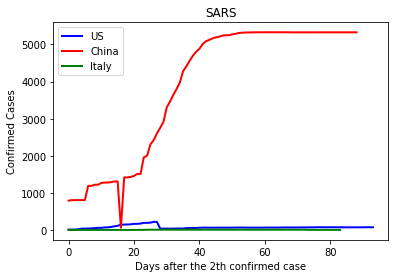

In [7]:
plt.plot(US.index, US['Cumulative number of case(s)'], 'b', linewidth = 2, label="US")
plt.plot(china.index, china['Cumulative number of case(s)'], 'r', linewidth = 2, label="China")
plt.plot(italy.index, italy['Cumulative number of case(s)'], 'g', linewidth = 2, label="Italy")
plt.title("SARS")
plt.xlabel("Days after the 2th confirmed case")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()